## the bottleneck model to tackle 250 products

In [4]:
import AssortmentGenerator as AG
import MarkovGenerator as MG
import Models
import time

import numpy as np
import torch
import torch.nn as nn

from torch import optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

start_time = time.time()

N_prod = 250        # number of products
Vec_Len = N_prod + 1
Neck_Len = 30       # bottle neck width
EPOCHS = 1000
SAMPLE_AMOUNT = 100000
BATCH_SIZE = 5000
TRAIN_VALI_RATE = 0.9
ADAM_LR = 0.0005

# generate latent parameters
transP = MG.GenMarkovM(
    product_num = N_prod,
    gen_func = lambda x : MG.GenTransprob_Sparse(x)
)
lams = np.random.uniform(low = 0, high = 1, size = N_prod)
lams = lams / sum(lams)

# generate synthetic data
INPUT = np.zeros((SAMPLE_AMOUNT,Vec_Len))
OUTPUT = np.zeros((SAMPLE_AMOUNT,Vec_Len))
for i in range(SAMPLE_AMOUNT):
    
    # generate input vector, which has length vec_len
    # the first element is 0, which should be ignored when treated as an assortment
    assort = AG.GenAssortment_Sparse(N_prod)    
    INPUT[i] = AG.Product_0(assort)
    OUTPUT[i] = MG.Absorbing_Calculator(lams, transP, assort)

print("data generated!")
print("total time elapse : ",time.time()-start_time)

train_dataset = TensorDataset(torch.Tensor(INPUT[:int(SAMPLE_AMOUNT * TRAIN_VALI_RATE)]),torch.Tensor(OUTPUT[:int(SAMPLE_AMOUNT * TRAIN_VALI_RATE)]))    
vali_dataset = TensorDataset(torch.Tensor(INPUT[int(SAMPLE_AMOUNT * TRAIN_VALI_RATE):]),torch.Tensor(OUTPUT[int(SAMPLE_AMOUNT * TRAIN_VALI_RATE):]))    

train_loader = DataLoader(train_dataset, shuffle=True, batch_size = BATCH_SIZE)
vali_loader = DataLoader(vali_dataset, shuffle=True, batch_size = len(vali_dataset))

model = Models.Bottleneck(Vec_Len, Neck_Len)
optimizer = optim.Adam(model.parameters(), lr = ADAM_LR)
criterion = nn.BCELoss()

training_losses = []
vali_losses = []

for epo in range(1,EPOCHS+1):
    if epo % 50 == 0:
        print("epoch : ",epo)
    for step, (IN, TEST) in enumerate(train_loader):
        
        OUT = model(IN)
        loss = criterion(OUT,TEST)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        training_losses.append(loss.detach().item())
        
    for step, (VALI_IN, VALI_TEST) in enumerate(vali_loader):
        VALI_OUT = model(VALI_IN)
        loss = criterion(VALI_OUT,VALI_TEST)

        vali_losses.append(loss.detach().item())


np.save('EXP2_dump/bottleneck_train_loss', training_losses)
np.save('EXP2_dump/bottleneck_vali_loss', vali_losses)
torch.save(model, "EXP2_dump/bottleneck_model.pth")

data generated!
total time elapse :  144.4248719215393
144.91674280166626
145.01958298683167
145.10080099105835
145.18687105178833
145.2633080482483
145.37018489837646
145.44212579727173
145.50734281539917
145.5713837146759
145.63745594024658
145.73543190956116
145.8007800579071
145.86301279067993
145.92706203460693
145.99279165267944
146.08493494987488
146.14704203605652
146.20974588394165
146.43251776695251
146.5076117515564
146.57399773597717
146.6445288658142
146.73949790000916
146.80228400230408
146.867084980011
146.9298276901245
146.99175095558167
147.09438371658325
147.15918803215027
147.22176885604858
147.28331804275513
147.3476779460907
147.4486379623413
147.51263785362244
147.57826471328735
147.64002299308777
147.87119698524475
147.94171595573425
148.0066728591919
148.10995197296143
148.1728708744049
148.23323798179626
148.29464983940125
148.3579137325287
148.46066880226135
148.53106474876404
148.59384298324585
148.65508198738098
148.7167990207672
148.8176348209381
148.878753

179.4439287185669
179.50558376312256
179.56771683692932
179.6310179233551
179.69518280029297
179.79609394073486
179.85814881324768
179.9212019443512
179.9816038608551
180.0804648399353
180.14735579490662
180.20677089691162
180.2674629688263
180.32887291908264
180.54275393486023
180.61005687713623
180.67082381248474
180.77157974243164
180.83371901512146
180.89503574371338
180.95573687553406
181.02035689353943
181.12074398994446
181.19817805290222
181.26281595230103
181.32376384735107
181.42441868782043
181.49004888534546
181.55064868927002
181.61142086982727
181.6726746559143
181.77302193641663
181.95801401138306
182.0284547805786
182.12810802459717
182.1905779838562
182.25343680381775
182.31499910354614
182.37565994262695
182.47533893585205
182.53560876846313
182.59709477424622
182.65760898590088
182.75867986679077
182.82151770591736
182.8836898803711
182.94571900367737
183.01071286201477
183.10963582992554
183.17153191566467
183.34917569160461
183.45935487747192
183.521901845932
183.5

213.4650149345398
213.5253870487213
213.62501502037048
213.68998289108276
213.75092673301697
213.81093406677246
213.873028755188
213.97418594360352
epoch :  50
214.1456708908081
214.21673798561096
214.315358877182
214.37750387191772
214.43985891342163
214.50129795074463
214.56280875205994
214.66339087486267
214.7254238128662
214.7851300239563
214.84589886665344
214.9472770690918
215.00965285301208
215.07115387916565
215.1319386959076
215.19424104690552
215.29320192337036
215.35571575164795
215.53787899017334
215.64280080795288
215.7043378353119
215.76818084716797
215.82791709899902
215.8883147239685
215.9897758960724
216.0498719215393
216.11909580230713
216.17958974838257
216.28093600273132
216.34323573112488
216.40427494049072
216.46490502357483
216.52845692634583
216.62787294387817
216.68950295448303
216.752121925354
216.96782994270325
217.03478288650513
217.095538854599
217.15580582618713
217.21873593330383
217.3213758468628
217.38198685646057
217.44570398330688
217.50522089004517
2

247.69083905220032
247.79751181602478
247.85820484161377
247.92133283615112
247.98096370697021
248.07911777496338
248.14521288871765
248.2057180404663
248.26647877693176
248.3290069103241
248.43201208114624
248.49327278137207
248.55431699752808
248.616956949234
248.67979788780212
248.78211998939514
248.84427499771118
248.90797591209412
249.1279480457306
249.19599103927612
249.257230758667
249.31792211532593
249.41881394386292
249.48311972618103
249.54458594322205
249.6058509349823
249.66911005973816
249.76901769638062
249.83101892471313
249.89498805999756
249.95524287223816
250.0171148777008
250.11704874038696
250.17862200737
250.2396490573883
250.29949188232422
250.51291394233704
250.58102178573608
250.64693188667297
250.74624800682068
250.808837890625
250.86959791183472
250.93042469024658
250.99294900894165
251.09264373779297
251.1545968055725
251.21734976768494
251.2781229019165
251.33992886543274
251.43904209136963
251.49977493286133
251.56024193763733
251.62260675430298
251.685441

282.22573804855347
282.2869567871094
282.3470289707184
282.40864992141724
282.6232919692993
282.69076681137085
282.75395679473877
282.8545207977295
282.916179895401
282.9780647754669
283.04046392440796
283.10350799560547
283.2030646800995
283.2646758556366
283.32754468917847
283.3870997428894
283.44836473464966
283.54847478866577
283.60882472991943
283.6693937778473
283.72999691963196
283.79229497909546
epoch :  100
284.0044107437134
284.0727119445801
284.1716248989105
284.23523473739624
284.2963647842407
284.3580160140991
284.4185438156128
284.5191159248352
284.58102774620056
284.64208984375
284.70355677604675
284.76542496681213
284.86388993263245
284.9238820075989
284.98684191703796
285.0475437641144
285.10805892944336
285.2088530063629
285.3814787864685
285.4901850223541
285.552729845047
285.61416697502136
285.6754219532013
285.73899483680725
285.83820271492004
285.9008228778839
285.96418380737305
286.02666187286377
286.08808183670044
286.18840074539185
286.24972581863403
286.310811

317.01406693458557
317.1271538734436
317.1937930583954
317.26104283332825
317.3267478942871
317.42857789993286
317.4942548274994
317.6704487800598
317.78051590919495
317.84385895729065
317.905277967453
317.9671549797058
318.03284668922424
318.1373178958893
318.2000548839569
318.26361179351807
318.32628989219666
318.3876419067383
318.4889259338379
318.5508418083191
318.6128408908844
318.67560601234436
318.7779929637909
318.842652797699
318.9126479625702
319.1315908432007
319.2013509273529
319.26289796829224
319.3250319957733
319.38798475265503
319.4914770126343
319.5550379753113
319.61883902549744
319.68060278892517
319.74225878715515
319.8430347442627
319.90479278564453
319.96673583984375
320.02827191352844
320.1306459903717
320.19549679756165
320.2575068473816
320.31895685195923
320.5359380245209
320.6038410663605
320.66719794273376
320.7320568561554
320.8339829444885
320.8960998058319
320.9581787586212
321.0193998813629
321.08168387413025
321.1830358505249
321.24663400650024
321.3093

KeyboardInterrupt: 

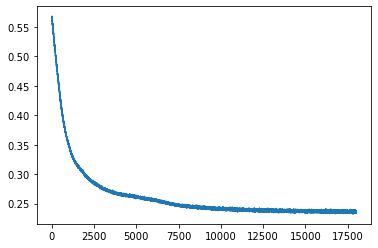

In [37]:
train_loss = np.load('EXP1_dump/bottleneck_train_loss.npy')
plt.plot(train_loss)

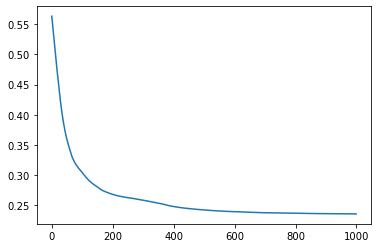

In [38]:
vali_loss = np.load('EXP1_dump/bottleneck_vali_loss.npy')
plt.plot(vali_loss)